<a href="https://colab.research.google.com/github/acucenarodrigues1998/SeniorLabsChallenge/blob/main/SeniorSistemasChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 160
pd.options.display.max_rows = 160

## Pré-Análise e criação de features úteis

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/SeniorSA/seniorlabs-challenge/main/sms_senior.csv', encoding= 'unicode_escape')
data.head()

,Full_Text,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,help,right,take,will,wont,message,next.,make,name,yes,feel,thats,way,miss,going,try,first,lor,can,meet,getting,just,lol,really,always,love,amp,ill,know,let,work,sure,wait,yeah,anything,tell,please,thanks,msg,see,pls,need,nokia,tomorrow,hope,ltgt,well,didnt,get,ask,cant,time,morning,place,give,happy,sorry,new,find,year,later,pick,good,come,nice,said,day,money,babe,something,waiting,much,stop,one,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no


In [4]:
data.shape

(5574, 154)

In [5]:
data.columns

Index(['Full_Text', 'got', 'great', 'wat', 'free', 'text', 'txt', 'win',
       'already', 'dun',
       ...
       'number', 'wish', 'leave', 'thing', 'many', 'wan', 'Common_Word_Count',
       'Word_Count', 'Date', 'IsSpam'],
      dtype='object', length=154)

In [6]:
data.dtypes

Full_Text            object
got                   int64
great                 int64
wat                   int64
free                  int64
text                  int64
txt                   int64
win                   int64
already               int64
dun                   int64
say                   int64
around                int64
dont                  int64
think                 int64
back                  int64
hey                   int64
like                  int64
now                   int64
send                  int64
still                 int64
even                  int64
friends               int64
per                   int64
call                  int64
claim                 int64
customer              int64
prize                 int64
mobile                int64
gonna                 int64
home                  int64
ive                   int64
soon                  int64
today                 int64
tonight               int64
want                  int64
cash                

In [7]:
data.isna().sum()

Full_Text            0
got                  0
great                0
wat                  0
free                 0
text                 0
txt                  0
win                  0
already              0
dun                  0
say                  0
around               0
dont                 0
think                0
back                 0
hey                  0
like                 0
now                  0
send                 0
still                0
even                 0
friends              0
per                  0
call                 0
claim                0
customer             0
prize                0
mobile               0
gonna                0
home                 0
ive                  0
soon                 0
today                0
tonight              0
want                 0
cash                 0
reply                0
urgent               0
week                 0
won                  0
help                 0
right                0
take                 0
will       

In [8]:
data['Date'].min()

'2017-01-01 00:08:00'

In [9]:
data['Date'].max()

'2017-03-31 23:56:00'

In [10]:
data.describe()

,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,help,right,take,will,wont,message,next.,make,name,yes,feel,thats,way,miss,going,try,first,lor,can,meet,getting,just,lol,really,always,love,amp,ill,know,let,work,sure,wait,yeah,anything,tell,please,thanks,msg,see,pls,need,nokia,tomorrow,hope,ltgt,well,didnt,get,ask,cant,time,morning,place,give,happy,sorry,new,find,year,later,pick,good,come,nice,said,day,money,babe,something,waiting,much,stop,one,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count
count,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.00000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000
mean,0.043057,0.019914,0.017223,0.049874,0.033907,0.029243,0.013097,0.016146,0.009867,0.016505,0.010944,0.052386,0.023681,0.027269,0.019914,0.043775,0.085935,0.034266,0.027628,0.011302,0.010405,0.010585,0.104234,0.020273,0.010405,0.016505,0.024937,0.010405,0.029064,0.013455,0.010585,0.025296,0.010764,0.034625,0.013276,0.025834,0.011661,0.020811,0.013097,0.010585,0.016505,0.022605,0.068712,0.010047,0.014891,0.011123,0.018120,0.009150,0.016505,0.011123,0.017761,0.018120,0.014173,0.030678,0.009150,0.011123,0.028705,0.072659,0.013994,0.008970,0.066021,0.013097,0.015429,0.010226,0.035881,0.015070,0.042878,0.046107,0.012558,0.017940,0.012738,0.010585,0.015429,0.013455,0.024578,0.023502,0.013635,0.014891,0.028166,0.019555,0.029961,0.012917,0.016146,0.018658,0.049516,0.024220,0.014532,0.069968,0.015788,0.022426,0.037316,0.013814,0.010585,0.018479,0.019196,0.027987,0.024399,0.013097,0.008970,0.024040,0.012738,0.042339,0.041084,0.010226,0.015608,0.038034,0.010226,0.013814,0.012199,0.009508,0.020273,0.027808,0.030678,0.010047,0.020632,0.010764,0.008970,0.010585,0.011661,0.009508,0.008970,0.009688,0.020273,0.014173,0.008970,0.013635,0.009508,0.012199,0.013994,0.010944,0.012199,0.010226,0.011482,0.00897,0.012199,0.012738,0.008970,0.013097,0.009508,0.010047,0.012199,0.008970,0.022605,0.016864,0.009329,0.009867,0.010944,0.010585,0.010

In [11]:
data['Datetime'] = pd.to_datetime(data['Date'])

In [12]:
data['month_name'] = data['Datetime'].dt.month_name()

In [13]:
data['Date'] = data['Datetime'].dt.date

## Desafio Data Science

A quantidade de spams (mensagens não solicitadas) que recebemos diariamente, não para de crescer. Os tipos de spam são diversos: anúncios de produtos / web sites, esquemas para ganhar dinheiro rápido, correntes, pornografia e etc.

### Input
O arquivo sms_senior.csv contém vários exemplos de mensagens comuns (4827 unidades) e mensagens spams (747 unidades). As mensagens foram submetidas a uma etapa de mineração de texto, com o objetivo de identificar as palavras mais frequentes na base de dados.

Segue as informações dos atributos do arquivo:

* 1 coluna contendo a mensagem original (Full_Text);
* 149 colunas com valores inteiros que indicam a frequência de uma determinada palavra na mensagem ("got"... "wan");
* 1 coluna contendo a quantidade de palavras frequentes na mensagem (Common_Words_Count);
* 1 coluna contendo a quantidade total de palavras da mensagem (Word_Count);
* 1 coluna contendo a data de recebimento da mensagem (Date);
* 1 coluna que identifica se a mensagem é spam ou não (IsSpam).

### Primeira Etapa
A primeira etapa do seu trabalho consiste em extrair estatísticas desta base de dados:

1. Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras, nuvem de palavras, etc).
2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;
3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade total de palavras (Word_Count) para cada mês;
4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).

### Segunda etapa
A segunda etapa consiste em aplicar um método capaz de classificar automaticamente as mensagens como “comum” e “spam”. Como você considera os resultados encontrados? Justifique.

### Output
Você pode utilizar qualquer linguagem de programação e ferramentas de software para extrair as informações das duas etapas do trabalho. Por fim, descreva o trabalho realizado em um artigo com duas ou três páginas no modelo anexo.

Lembre-se de apontar as estatísticas extraídas e de explicar o método de classificação utilizado, como a etapa de treinamento e classificação foram executadas, além dos resultados que foram encontrados.

O modelo parece grande, mas você pode ser bem objetivo. Os códigos fontes ou arquivos utilizados no trabalho deverão ser postados no github, onde o README deve explicar como proceder para executar sua solução


#### Funções auxiliares

In [14]:
import regex as re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.porter import PorterStemmer
from collections import Counter

from wordcloud import WordCloud

In [15]:
def sentences_building(tokens):
    row = ' '.join(tokens)
    return row

In [16]:
def data_cleaning(doc):

    doc = doc.replace('--', ' ')
    tokens = doc.split()

    stpw = set(stopwords.words())
    stpw.update(['ur', 'ok', 'it', 'im', 'i', 'm', "i'm"])
    
    tokens = [w.lower() for w in tokens]
    tokens = [word for word in tokens if word not in stpw]
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub('', word) for word in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    porter_stemmer = PorterStemmer()
    tokens = [porter_stemmer.stem(word) for word in tokens]

    sentence = sentences_building(tokens)
    
    return sentence

In [17]:
data['clean_Text'] = data['Full_Text'].apply(data_cleaning)

In [18]:
def plot_wordcloud(counts):

  counts = counts.set_index('word').to_dict()['frequencies']

  # create the WordCloud object
  wordcloud = WordCloud(background_color='white', width=1600, height=800)

  # generate the word cloud
  wordcloud.generate_from_frequencies(counts)

  #plot
  fig, ax = plt.subplots(figsize=(10,6))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.set_axis_off()
  plt.savefig('wc_geral.png')
  plt.show()

## Primeira Etapa - Análise Exploratória

In [19]:
words_counts = data.loc[:, 'got':'wan'].copy()
words_counts['IsSpam'] = data['IsSpam']
words_frequencies = words_counts.drop('IsSpam', axis=1).sum()\
.reset_index().sort_values(by=0, ascending=False).rename({'index': 'word', 
                                                          0: 'frequencies'}, axis=1)

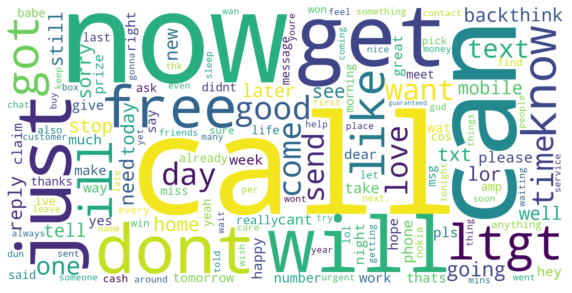

In [20]:
# 1. Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras, nuvem de palavras, etc).
## Palavras mais frequentes em todo o dataset
plot_wordcloud(words_frequencies)

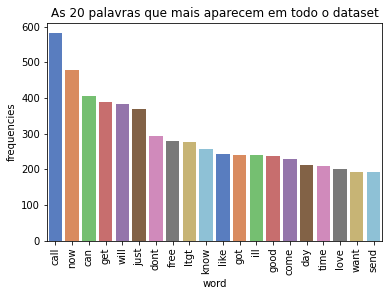

In [21]:
sns.barplot(x='word', y='frequencies', data=words_frequencies.head(20), palette="muted")
plt.xticks(rotation=90)
plt.title('As 20 palavras que mais aparecem em todo o dataset')
plt.savefig('frequ_20mais.png')
plt.show()

In [22]:
words_frequencies = words_counts[words_counts['IsSpam'] == 'yes'].drop('IsSpam', axis=1).sum()\
.reset_index().sort_values(by=0, ascending=False).rename({'index': 'word', 0: 'frequencies'}, axis=1)
words_frequencies = words_frequencies[words_frequencies['frequencies'] > 0]

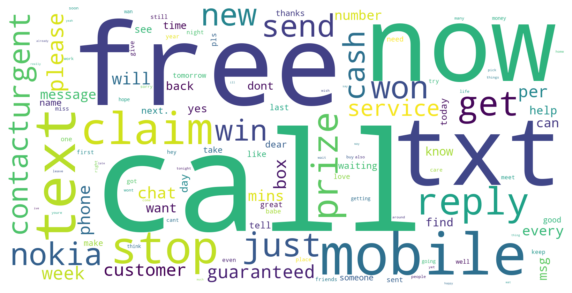

In [23]:
# Palavras mais comuns em Spam
plot_wordcloud(words_frequencies)

* É possível perceber que as palavras mais comuns em mensagens spam são 'free', 'claim', 'prize', 'now'

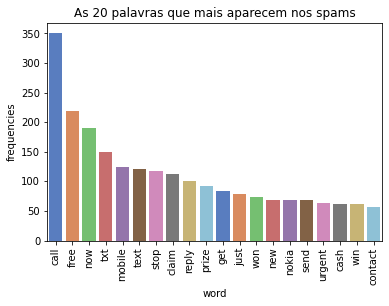

In [24]:
sns.barplot(x='word', y='frequencies', data=words_frequencies.head(20), palette="muted")
plt.xticks(rotation=90)
plt.title('As 20 palavras que mais aparecem nos spams')
plt.show()

In [25]:
words_frequencies = words_counts[words_counts['IsSpam'] == 'no'].drop('IsSpam', axis=1).sum()\
.reset_index().sort_values(by=0, ascending=False).rename({'index': 'word', 0: 'frequencies'}, axis=1)
words_frequencies = words_frequencies[words_frequencies['frequencies'] > 0]

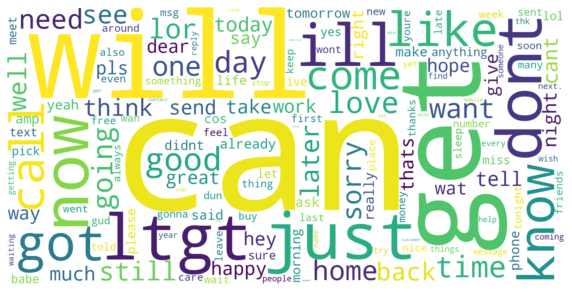

In [26]:
# Palavras mais comuns em mensagens Comum
plot_wordcloud(words_frequencies)

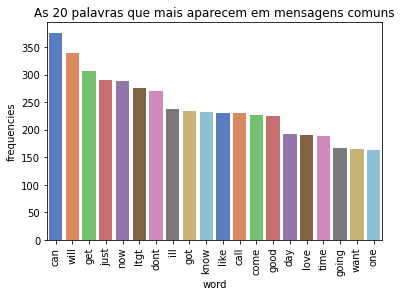

In [27]:
sns.barplot(x='word', y='frequencies', data=words_frequencies.head(20), palette="muted")
plt.xticks(rotation=90)
plt.title('As 20 palavras que mais aparecem em mensagens comuns')
plt.show()

Distribuição Spam x Comum
no     4827
yes     747
Name: IsSpam, dtype: int64





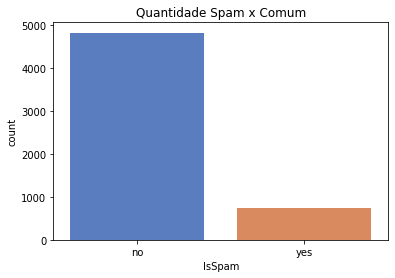




Quantidade de mensagens por mês
month_name
February    1756
January     1953
March       1865
Name: IsSpam, dtype: int64





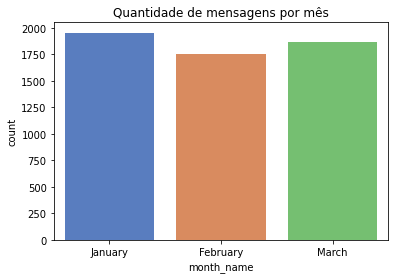




Quantidade de mensagens Spam x Comum por mês
month_name  IsSpam
February    no        1512
            yes        244
January     no        1687
            yes        266
March       no        1628
            yes        237
Name: IsSpam, dtype: int64





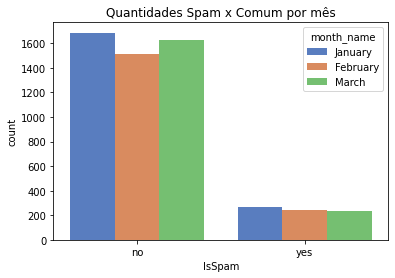

In [28]:
# 2. Quantidades de mensagens comuns e spams por mês
print('Distribuição Spam x Comum')
print(data['IsSpam'].value_counts())

print('\n\n')

sns.countplot(x='IsSpam', data=data, palette="muted")
plt.title('Quantidade Spam x Comum')
plt.show()

print('\n\n')

print('Quantidade de mensagens por mês')
print(data.groupby('month_name')['IsSpam'].count())

print('\n\n')

sns.countplot(x='month_name', data=data, palette="muted")
plt.title('Quantidade de mensagens por mês')
plt.show()

print('\n\n')

print('Quantidade de mensagens Spam x Comum por mês')
print(data.groupby(['month_name', 'IsSpam'])['IsSpam'].count())

print('\n\n')

sns.countplot(x='IsSpam', hue='month_name', data=data, palette="muted")
plt.title('Quantidades Spam x Comum por mês')
plt.savefig('qtd_spam_comum_mensal.png')
plt.show()

In [29]:
# 3. Máximo, mínimo, média, a mediana, o desvio padrão e a variância do Word_count por mês
print('Estatísticas descritivas para a contagem de palavras por mês')
data.groupby('month_name')['Word_Count'].agg(['min', 'max', 'mean', 'median', 'var']).T

Estatísticas descritivas para a contagem de palavras por mês


month_name,February,January,March
min,2.000000,2.000000,2.000000
max,100.000000,190.000000,115.000000
mean,16.029043,16.336918,16.285255
median,13.000000,13.000000,12.000000
var,121.935908,157.682535,134.008715


In [30]:
print('Estatísticas descritivas para a contagem de palavras em mensagens Spam e comuns por mês')
data.groupby(['month_name', 'IsSpam'])['Word_Count'].agg(['count', 'min', 'max', 'mean', 'median', 'var']).T

Estatísticas descritivas para a contagem de palavras em mensagens Spam e comuns por mês


month_name     February                  January                    March  \
IsSpam               no         yes           no         yes           no   
count       1512.000000  244.000000  1687.000000  266.000000  1628.000000   
min            2.000000    5.000000     2.000000    3.000000     2.000000   
max          100.000000   36.000000   190.000000   36.000000   115.000000   
mean          14.562831   25.114754    14.867220   25.657895    14.917076   
median        11.000000   26.000000    11.000000   27.000000    11.000000   
var          120.272688   36.513526   162.012015   29.773088   133.004183   

month_name              
IsSpam             yes  
count       237.000000  
min           2.000000  
max          39.000000  
mean         25.683544  
median       27.000000  
var          39.886720

In [31]:
# 4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).
data_comum = data[data['IsSpam'] == 'no'].copy()
mensagens_dia = data_comum.groupby(['month_name', 'Date'])['Full_Text'].count().reset_index()

In [32]:
print('Dia do mês com mais mensagens')
mensagens_dia.set_index('Date').groupby('month_name')['Full_Text']\
.agg(['idxmax', 'max'])\
.reset_index()\
.rename({'month_name': 'Mês', 
         'idxmax': 'Dia',
         'max':'Quantidade'}, axis=1)

Dia do mês com mais mensagens


,Mês,Dia,Quantidade
0,February,2017-02-13,72
1,January,2017-01-01,69
2,March,2017-03-08,69


## Segunda Etapa - Modelagem 

### Modelo 01 - Dataset + DecisionTree 

In [37]:
data

,Full_Text,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,help,right,take,will,wont,message,next.,make,name,yes,feel,thats,way,miss,going,try,first,lor,can,meet,getting,just,lol,really,always,love,amp,ill,know,let,work,sure,wait,yeah,anything,tell,please,thanks,msg,see,pls,need,nokia,tomorrow,hope,ltgt,well,didnt,get,ask,cant,time,morning,place,give,happy,sorry,new,find,year,later,pick,good,come,nice,said,day,money,babe,something,waiting,much,stop,one,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam,Datetime,month_name,clean_Text
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,12,2017-01-01,no,2017-01-01 00:08:00,January,hei congrat id luv iv go home
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,23,2017-01-01,no,2017-01-01 00:19:00,January,came look flat seem ok awai alot wiv work got ...
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,25,2017-01-01,yes,2017-01-01 01:53:00,January,urgent call landlin complimentari tenerif holi...
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2017-01-01,no,2017-01-01 02:14:00,January,hide anythi keep distanc
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,29,2017-01-01,no,2017-01-01 02:25:00,January,actual mobil full msg work onlin need send ltg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,"Sorry, left phone upstairs. OK, might be hecti...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (accuracy_score,
                             balanced_accuracy_score,
                             f1_score, 
                             precision_score,
                             recall_score,
                             roc_auc_score,
                             plot_confusion_matrix,
                             classification_report)
from sklearn.model_selection import train_test_split

In [38]:
y = data['IsSpam'].map({'no': 0, 'yes': 1})
x = data.loc[:, 'got':'wan'].copy()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    shuffle=True, 
                                                    random_state=2000) 

In [40]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preds = dt.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


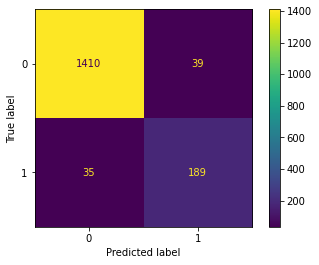

In [41]:
plot_confusion_matrix(dt, x_test, y_test);

In [42]:
print('Métricas Gerais:')
print('Acurácia: {}'.format(accuracy_score(y_test, preds)))
print('Acurácia Balanceada: {}'.format(balanced_accuracy_score(y_test, preds)))
print('F1: {}'.format(f1_score(y_test, preds)))
print('Precisão: {}'.format(precision_score(y_test, preds)))
print('Recall: {}'.format(recall_score(y_test, preds)))
print('ROC AUC: {}'.format(roc_auc_score(y_test, preds)))

Métricas Gerais:
Acurácia: 0.9557680812910938
Acurácia Balanceada: 0.9084174430641823
F1: 0.8362831858407079
Precisão: 0.8289473684210527
Recall: 0.84375
ROC AUC: 0.9084174430641822


In [43]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1449
           1       0.83      0.84      0.84       224

    accuracy                           0.96      1673
   macro avg       0.90      0.91      0.91      1673
weighted avg       0.96      0.96      0.96      1673



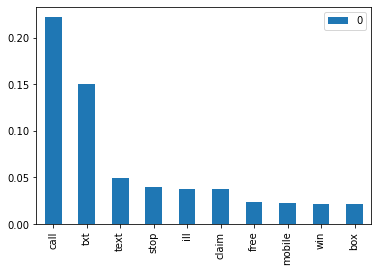

In [44]:
pd.DataFrame(dt.feature_importances_, 
             index=words_counts.drop('IsSpam', axis=1).columns)\
             .sort_values(by=0, ascending=False).head(10).plot.bar();

### Modelo 02 - TF-IDF + DecisionTree

In [45]:
from gensim import corpora

In [46]:
def create_token(text):
  tokens = text.split()
  return tokens

In [47]:
data['tokens'] = data['clean_Text'].apply(create_token)

In [48]:
mydict = corpora.Dictionary(data['tokens'])
print("Total unique words:")
print(len(mydict.token2id))


print("\nSample data from dictionary:")
i = 0
for key in mydict.token2id.keys():
    print("Word: {} - ID: {} ".format(key, mydict.token2id[key]))
    if i == 3:
        break
    i += 1

Total unique words:
6825

Sample data from dictionary:
Word: congrat - ID: 0 
Word: go - ID: 1 
Word: hei - ID: 2 
Word: home - ID: 3 


In [49]:
y = data['IsSpam'].map({'no': 0, 'yes': 1})
x = data[['tokens']]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    shuffle=True, 
                                                    random_state=2000) 

In [51]:
from gensim.models import TfidfModel
corpus = [mydict.doc2bow(line) for line in data['tokens']]

tfidf_model = TfidfModel(corpus)

In [52]:
import gensim

def create_tfidf_features(x):
  features_tfidf = []
  vocab_len = len(mydict.token2id)
  for index, row in x.iterrows():
    doc = mydict.doc2bow(row['tokens'])
    features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
    features_tfidf.append(features)
  return features_tfidf

In [53]:
x_train = create_tfidf_features(x_train)
x_test = create_tfidf_features(x_test)

In [54]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preds = dt.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


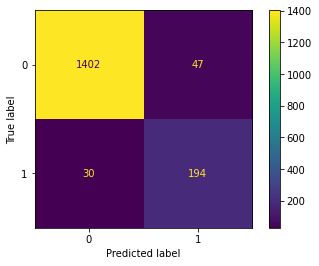

In [55]:
plot_confusion_matrix(dt, x_test, y_test);

In [56]:
print('Métricas Gerais:')
print('Acurácia: {}'.format(accuracy_score(y_test, preds)))
print('Acurácia Balanceada: {}'.format(balanced_accuracy_score(y_test, preds)))
print('F1: {}'.format(f1_score(y_test, preds)))
print('Precisão: {}'.format(precision_score(y_test, preds)))
print('Recall: {}'.format(recall_score(y_test, preds)))
print('ROC AUC: {}'.format(roc_auc_score(y_test, preds)))

Métricas Gerais:
Acurácia: 0.9539748953974896
Acurácia Balanceada: 0.9168176328502415
F1: 0.8344086021505377
Precisão: 0.8049792531120332
Recall: 0.8660714285714286
ROC AUC: 0.9168176328502415


In [57]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1449
           1       0.80      0.87      0.83       224

    accuracy                           0.95      1673
   macro avg       0.89      0.92      0.90      1673
weighted avg       0.96      0.95      0.95      1673



### Modelo 03: Word2Vec + LSTM

#### Criação do Dataset

In [58]:
from gensim.models import Word2Vec

In [59]:
def word_embedding(data, vector_size):
    w2v_model = Word2Vec(data, size=vector_size, min_count=1, workers=8)
    w2v_weights = w2v_model.wv.vectors
    return w2v_model, w2v_weights

In [60]:
def word2idx(word):
  return w2v_model.wv[word]

In [61]:
def idx2word(idx):
  return w2v_model.wv[idx]

In [62]:
lines = data['clean_Text']

vocab_words = [line.split(' ') for line in lines]

w2v_model, w2v_weights = word_embedding(vocab_words, 100)
vocab_size, embedding_size = w2v_weights.shape

print(vocab_size, embedding_size)

6826 100


In [63]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np


In [64]:
data['label'] = data['IsSpam'].map({'no': 0, 'yes': 1})
data_train = data[['clean_Text', 'label']].copy()
y = data_train['label']
x = data_train['clean_Text']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, stratify=data_train['label'], shuffle=True, random_state=True)

In [65]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1
print("Total de palavras", vocab_size)

Total de palavras 5538


In [66]:
x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=100)
x_valid = pad_sequences(tokenizer.texts_to_sequences(x_valid), maxlen=100)

In [67]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(5538, 100)


#### LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
def define_model(vocab_size, embedding_size, w2v_weights):
    
    #arquitetura da rede
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, weights=[w2v_weights]))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))


    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
def model_training(x_train, y_train):

    callback_earlystopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
    callback_checkpoint = ModelCheckpoint(filepath='./w2v_lstm_best_model.h5', monitor='loss', verbose=1, save_best_only=True,mode='min')

    history = model.fit(
        x_train, 
        y_train, 
        epochs=10, 
        batch_size=20,
        shuffle=True,
        validation_split=0.1,
        callbacks=[callback_earlystopping, callback_checkpoint]
    )
    return history

In [ ]:
print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)

# Instanciado o modelo de predição
model = define_model(vocab_size, embedding_size, embedding_matrix)

hist = model_training(x_train, y_train)

x_train shape: (3901, 100) y_train shape: (3901,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         553800    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 596,105
Trainable params: 596,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.models import load_model
model = load_model('/content/w2v_lstm_best_model.h5')
score = model.evaluate(x_valid, y_valid)

print("Acurácia:",score[1])
print("Loss:",score[0])

53/53 [==============================] - 1s 4ms/step - loss: 0.0905 - accuracy: 0.9833
Acurácia: 0.9832636117935181
Loss: 0.09052513539791107


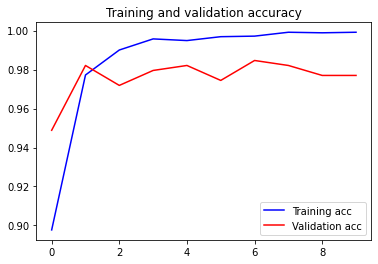

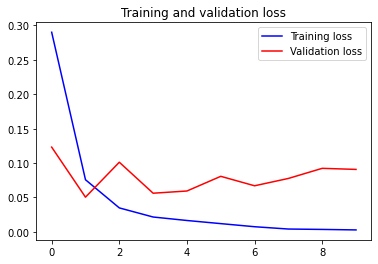

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
model_res = model.predict(x_valid) > 0.5

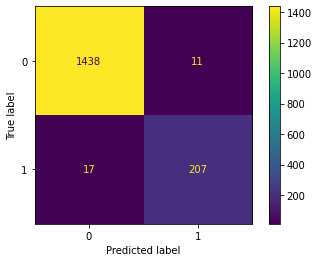

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cmd = ConfusionMatrixDisplay(confusion_matrix(y_valid, model_res))
cmd.from_predictions(y_valid, model_res);

In [ ]:
print('Métricas Gerais:')
print('Acurácia: {}'.format(accuracy_score(y_valid, model_res)))
print('Acurácia Balanceada: {}'.format(balanced_accuracy_score(y_valid, model_res)))
print('F1: {}'.format(f1_score(y_valid, model_res)))
print('Precisão: {}'.format(precision_score(y_valid, model_res)))
print('Recall: {}'.format(recall_score(y_valid, model_res)))
print('ROC AUC: {}'.format(roc_auc_score(y_valid, model_res)))

Métricas Gerais:
Acurácia: 0.9832635983263598
Acurácia Balanceada: 0.958257850241546
F1: 0.9366515837104072
Precisão: 0.9495412844036697
Recall: 0.9241071428571429
ROC AUC: 0.9582578502415459


In [ ]:
print(classification_report(y_valid, model_res))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1449
           1       0.95      0.92      0.94       224

    accuracy                           0.98      1673
   macro avg       0.97      0.96      0.96      1673
weighted avg       0.98      0.98      0.98      1673

